In [1]:
# imports
import snntorch as snn
from snntorch import spikeplot as splt
from snntorch import spikegen

import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

Plot settings imported from snnTorch documentation

In [2]:
#@title Plotting Settings
def plot_mem(mem, title=False):
  if title:
    plt.title(title)
  plt.plot(mem)
  plt.xlabel("Time step")
  plt.ylabel("Membrane Potential")
  plt.xlim([0, 50])
  plt.ylim([0, 1])
  plt.show()

def plot_step_current_response(cur_in, mem_rec, vline1):
  fig, ax = plt.subplots(2, figsize=(8,6),sharex=True)

  # Plot input current
  ax[0].plot(cur_in, c="tab:orange")
  ax[0].set_ylim([0, 0.2])
  ax[0].set_ylabel("Input Current ($I_{in}$)")
  ax[0].set_title("Lapicque's Neuron Model With Step Input")

  # Plot membrane potential
  ax[1].plot(mem_rec)
  ax[1].set_ylim([0, 0.6]) 
  ax[1].set_ylabel("Membrane Potential ($U_{mem}$)")

  if vline1:
    ax[1].axvline(x=vline1, ymin=0, ymax=2.2, alpha = 0.25, linestyle="dashed", c="black", linewidth=2, zorder=0, clip_on=False)
  plt.xlabel("Time step")

  plt.show()


def plot_current_pulse_response(cur_in, mem_rec, title, vline1=False, vline2=False, ylim_max1=False):

  fig, ax = plt.subplots(2, figsize=(8,6),sharex=True)

  # Plot input current
  ax[0].plot(cur_in, c="tab:orange")
  if not ylim_max1:
    ax[0].set_ylim([0, 0.2])
  else:
    ax[0].set_ylim([0, ylim_max1])
  ax[0].set_ylabel("Input Current ($I_{in}$)")
  ax[0].set_title(title)

  # Plot membrane potential
  ax[1].plot(mem_rec)
  ax[1].set_ylim([0, 1])
  ax[1].set_ylabel("Membrane Potential ($U_{mem}$)")

  if vline1:
    ax[1].axvline(x=vline1, ymin=0, ymax=2.2, alpha = 0.25, linestyle="dashed", c="black", linewidth=2, zorder=0, clip_on=False)
  if vline2:
    ax[1].axvline(x=vline2, ymin=0, ymax=2.2, alpha = 0.25, linestyle="dashed", c="black", linewidth=2, zorder=0, clip_on=False)
  plt.xlabel("Time step")

  plt.show()

def compare_plots(cur1, cur2, cur3, mem1, mem2, mem3, vline1, vline2, vline3, vline4, title):
  # Generate Plots
  fig, ax = plt.subplots(2, figsize=(8,6),sharex=True)

  # Plot input current
  ax[0].plot(cur1)
  ax[0].plot(cur2)
  ax[0].plot(cur3)
  ax[0].set_ylim([0, 0.2])
  ax[0].set_ylabel("Input Current ($I_{in}$)")
  ax[0].set_title(title)

  # Plot membrane potential
  ax[1].plot(mem1)
  ax[1].plot(mem2)
  ax[1].plot(mem3)
  ax[1].set_ylim([0, 1])
  ax[1].set_ylabel("Membrane Potential ($U_{mem}$)")

  ax[1].axvline(x=vline1, ymin=0, ymax=2.2, alpha = 0.25, linestyle="dashed", c="black", linewidth=2, zorder=0, clip_on=False)
  ax[1].axvline(x=vline2, ymin=0, ymax=2.2, alpha = 0.25, linestyle="dashed", c="black", linewidth=2, zorder=0, clip_on=False)
  ax[1].axvline(x=vline3, ymin=0, ymax=2.2, alpha = 0.25, linestyle="dashed", c="black", linewidth=2, zorder=0, clip_on=False)
  ax[1].axvline(x=vline4, ymin=0, ymax=2.2, alpha = 0.25, linestyle="dashed", c="black", linewidth=2, zorder=0, clip_on=False)

  plt.xlabel("Time step")

  plt.show()

def plot_cur_mem_spk(cur, mem, spk, thr_line=False, vline=False, title=False, ylim_max2=1.25):
  # Generate Plots
  fig, ax = plt.subplots(3, figsize=(8,6), sharex=True, 
                        gridspec_kw = {'height_ratios': [1, 1, 0.4]})

  # Plot input current
  ax[0].plot(cur, c="tab:orange")
  ax[0].set_ylim([0, 0.4])
  ax[0].set_xlim([0, 200])
  ax[0].set_ylabel("Input Current ($I_{in}$)")
  if title:
    ax[0].set_title(title)

  # Plot membrane potential
  ax[1].plot(mem)
  ax[1].set_ylim([0, ylim_max2]) 
  ax[1].set_ylabel("Membrane Potential ($U_{mem}$)")
  if thr_line:
    ax[1].axhline(y=thr_line, alpha=0.25, linestyle="dashed", c="black", linewidth=2)
  plt.xlabel("Time step")

  # Plot output spike using spikeplot
  splt.raster(spk, ax[2], s=400, c="black", marker="|")
  if vline:
    ax[2].axvline(x=vline, ymin=0, ymax=6.75, alpha = 0.15, linestyle="dashed", c="black", linewidth=2, zorder=0, clip_on=False)
  plt.ylabel("Output spikes")
  plt.yticks([]) 

  plt.show()

def plot_spk_mem_spk(spk_in, mem, spk_out, title):
  # Generate Plots
  fig, ax = plt.subplots(3, figsize=(8,6), sharex=True, 
                        gridspec_kw = {'height_ratios': [0.4, 1, 0.4]})

  # Plot input current
  splt.raster(spk_in, ax[0], s=400, c="black", marker="|")
  ax[0].set_ylabel("Input Spikes")
  ax[0].set_title(title)
  plt.yticks([]) 

  # Plot membrane potential
  ax[1].plot(mem)
  ax[1].set_ylim([0, 1])
  ax[1].set_ylabel("Membrane Potential ($U_{mem}$)")
  ax[1].axhline(y=0.5, alpha=0.25, linestyle="dashed", c="black", linewidth=2)
  plt.xlabel("Time step")

  # Plot output spike using spikeplot
  splt.raster(spk_rec, ax[2], s=400, c="black", marker="|")
  plt.ylabel("Output spikes")
  plt.yticks([]) 

  plt.show()


def plot_reset_comparison(spk_in, mem_rec, spk_rec, mem_rec0, spk_rec0):
  # Generate Plots to Compare Reset Mechanisms
  fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,6), sharex=True, 
                        gridspec_kw = {'height_ratios': [0.4, 1, 0.4], 'wspace':0.05})

  # Reset by Subtraction: input spikes
  splt.raster(spk_in, ax[0][0], s=400, c="black", marker="|")
  ax[0][0].set_ylabel("Input Spikes")
  ax[0][0].set_title("Reset by Subtraction")
  ax[0][0].set_yticks([])

  # Reset by Subtraction: membrane potential 
  ax[1][0].plot(mem_rec)
  ax[1][0].set_ylim([0, 0.7])
  ax[1][0].set_ylabel("Membrane Potential ($U_{mem}$)")
  ax[1][0].axhline(y=0.5, alpha=0.25, linestyle="dashed", c="black", linewidth=2)

  # Reset by Subtraction: output spikes
  splt.raster(spk_rec, ax[2][0], s=400, c="black", marker="|")
  ax[2][0].set_yticks([])
  ax[2][0].set_xlabel("Time step")
  ax[2][0].set_ylabel("Output Spikes")

  # Reset to Zero: input spikes
  splt.raster(spk_in, ax[0][1], s=400, c="black", marker="|")
  ax[0][1].set_title("Reset to Zero")
  ax[0][1].set_yticks([])

  # Reset to Zero: membrane potential
  ax[1][1].plot(mem_rec0)
  ax[1][1].set_ylim([0, 0.7])
  ax[1][1].axhline(y=0.5, alpha=0.25, linestyle="dashed", c="black", linewidth=2)
  ax[1][1].set_yticks([])
  ax[2][1].set_xlabel("Time step")

  # Reset to Zero: output spikes
  splt.raster(spk_rec0, ax[2][1], s=400, c="black", marker="|")
  ax[2][1].set_yticks([])

  plt.show()


                                   GENERAL REPRESENTATION OF LIF NEURON
τ*dUmem(t)/dt=−Umem(t)+RIin(t)
                                   SOLVING THE ODE
U(t+Δt)=U(t)+Δt/τ(−U(t)+RIin(t))


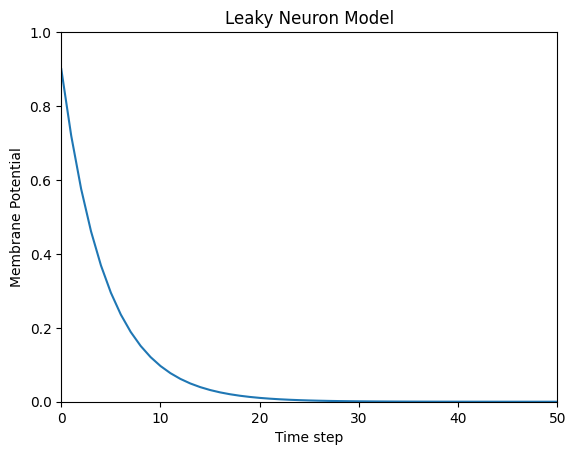

In [3]:
def leaky_integrate_neuron(U, time_step=1e-3, I=0, R=5e7, C=1e-10):
  tau = R*C
  U = U + (time_step/tau)*(-U + I*R)
  return U
num_steps = 100
U = 0.9
U_trace = []  # keeps a record of U for plotting

for step in range(num_steps):
  U_trace.append(U)
  U = leaky_integrate_neuron(U)  # solve next step of U

plot_mem(U_trace, "Leaky Neuron Model")

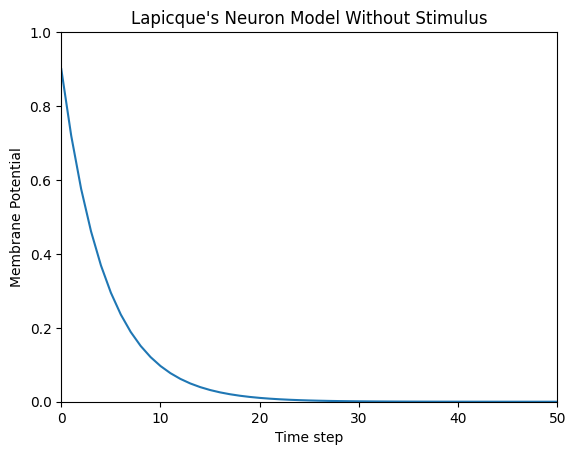

In [4]:
# pass updated value of mem and cur_in[step]=0 at every time step
time_step = 1e-3
R = 5
C = 1e-3
# leaky integrate and fire neuron, tau=5e-3
lif1 = snn.Lapicque(R=R, C=C, time_step=time_step)
mem = torch.ones(1) * 0.9  # U=0.9 at t=0
cur_in = torch.zeros(num_steps)  # I=0 for all t 
spk_out = torch.zeros(1)  # initialize output spikes
mem_rec = [mem]
for step in range(num_steps):
  spk_out, mem = lif1(cur_in[step], mem)

  # Store recordings of membrane potential
  mem_rec.append(mem)

# crunch the list of tensors into one tensor
mem_rec = torch.stack(mem_rec)

plot_mem(mem_rec, "Lapicque's Neuron Model Without Stimulus")

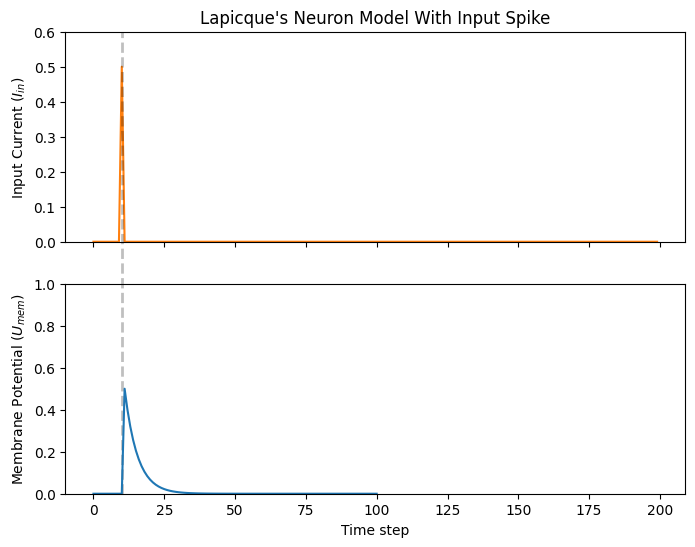

In [5]:

cur_in4 = torch.cat((torch.zeros(10), torch.ones(1)*0.5, torch.zeros(189)), 0)  # input only on for 1 time step
mem = torch.zeros(1) 
spk_out = torch.zeros(1)
mem_rec4 = [mem]

# neuron simulation
for step in range(num_steps):
  spk_out, mem = lif1(cur_in4[step], mem)
  mem_rec4.append(mem)
mem_rec4 = torch.stack(mem_rec4)

plot_current_pulse_response(cur_in4, mem_rec4, "Lapicque's Neuron Model With Input Spike", 
                            vline1=10, ylim_max1=0.6)

Applying reset mechanism and controlling threshold voltages

In [6]:
num_steps=199

In [7]:
def leaky_integrate_and_fire(mem, cur=0, threshold=1, time_step=1e-3, R=5.1, C=5e-3):
  tau_mem = R*C
  spk = (mem > threshold)
  mem = mem + (time_step/tau_mem)*(-mem + cur*R) - spk*threshold  # every time spk=1, subtract the threhsold
  return mem, spk

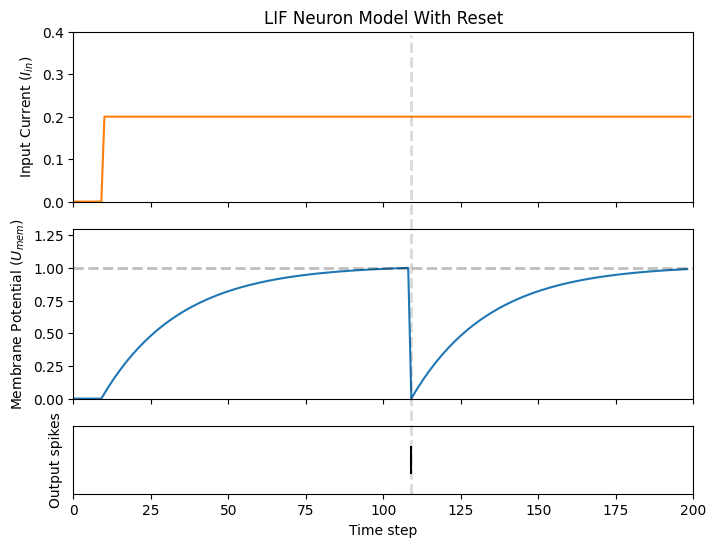

In [8]:
# Small step current input
cur_in = torch.cat((torch.zeros(10), torch.ones(190)*0.2), 0)
mem = torch.zeros(1)
mem_rec = []
spk_rec = []

# neuron simulation
for step in range(num_steps):
  mem, spk = leaky_integrate_and_fire(mem, cur_in[step])
  mem_rec.append(mem)
  spk_rec.append(spk)

# convert lists to tensors
mem_rec = torch.stack(mem_rec)
spk_rec = torch.stack(spk_rec)

plot_cur_mem_spk(cur_in, mem_rec, spk_rec, thr_line=1, vline=109, ylim_max2=1.3, 
                 title="LIF Neuron Model With Reset")

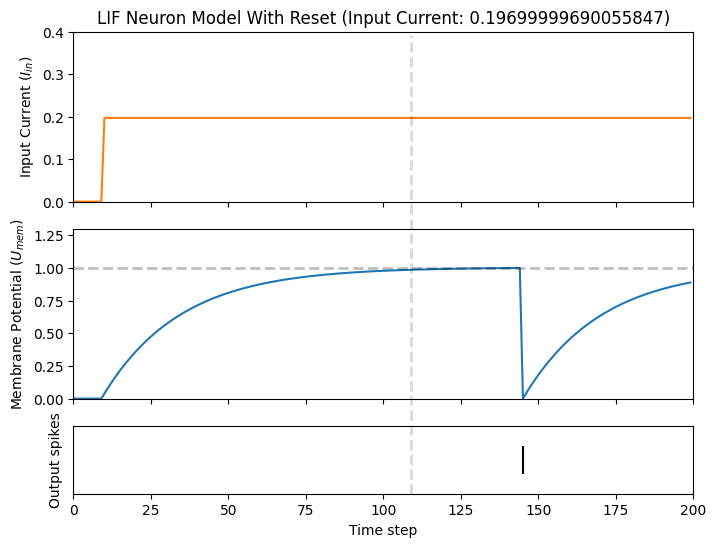

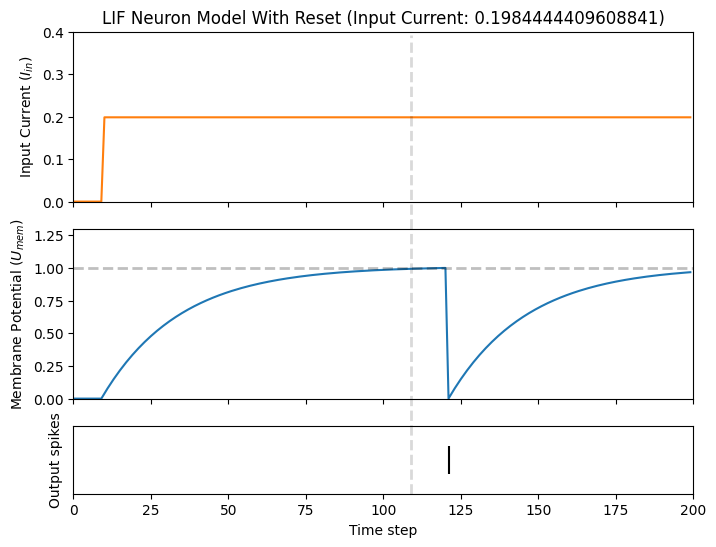

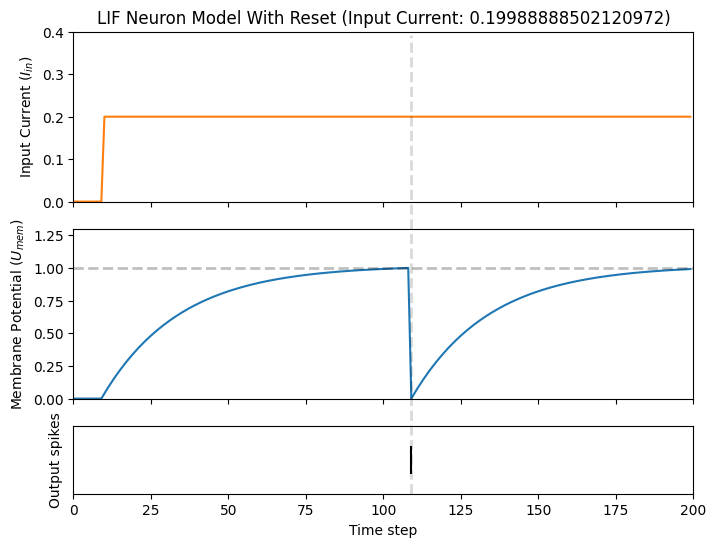

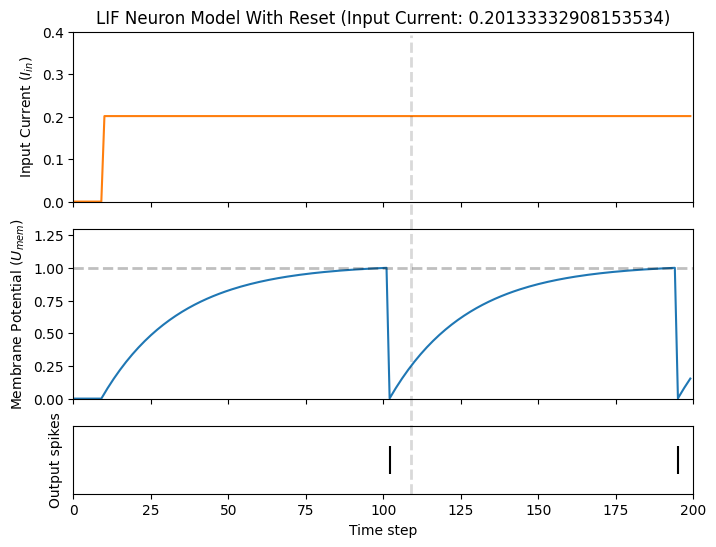

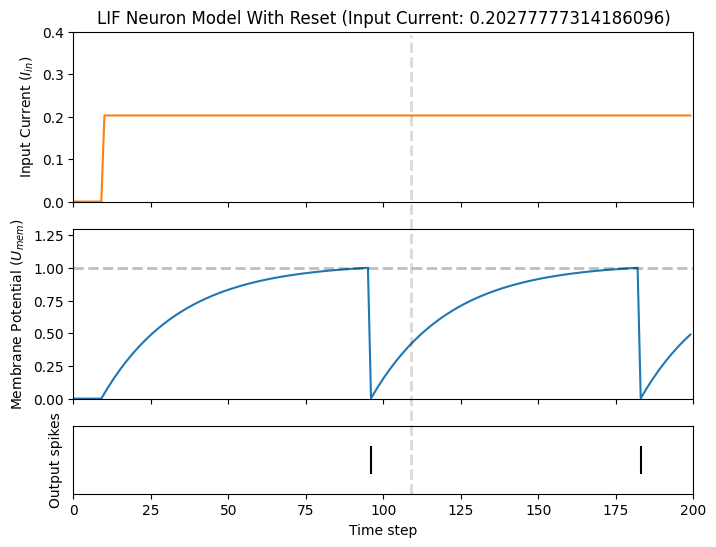

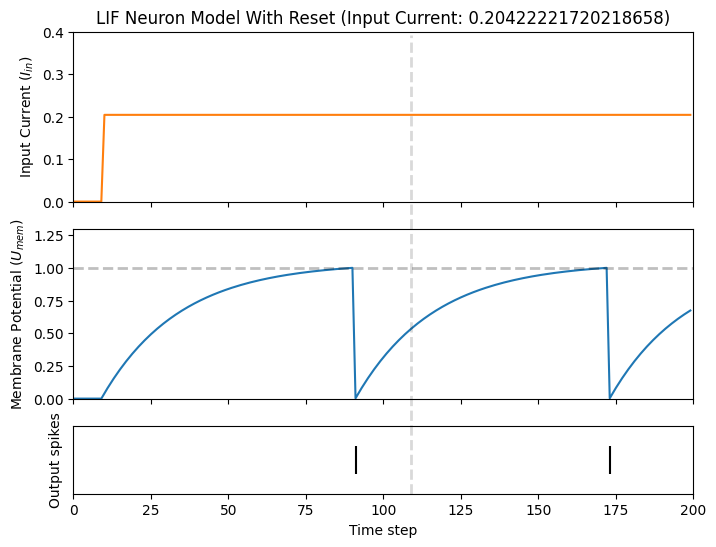

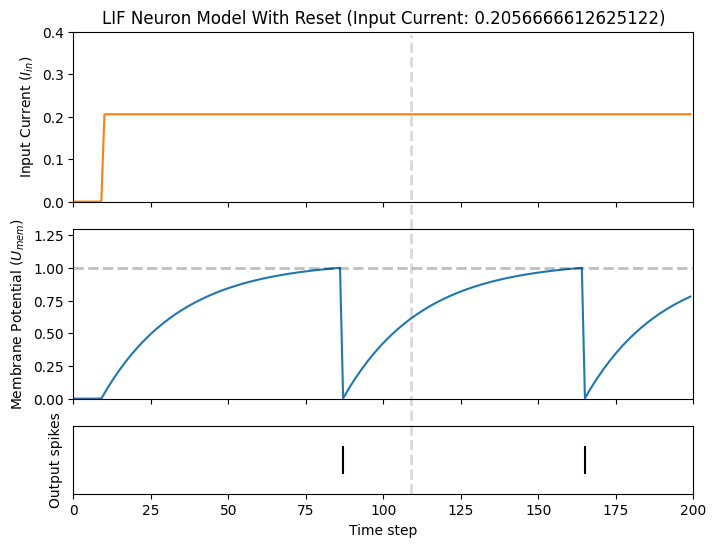

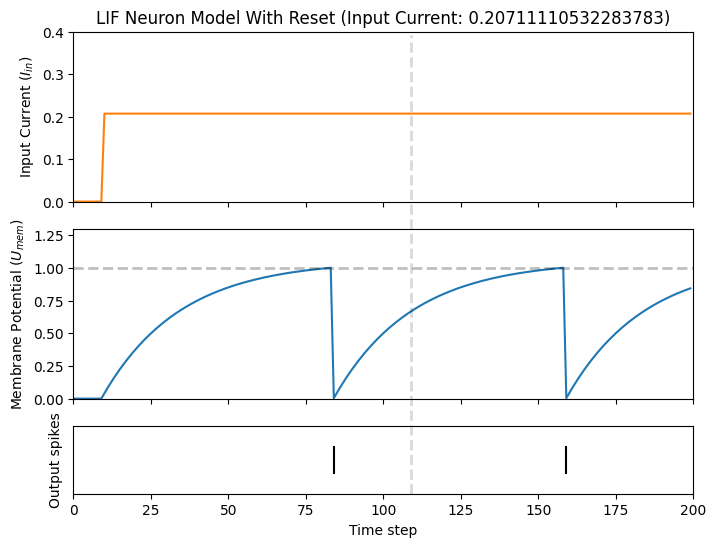

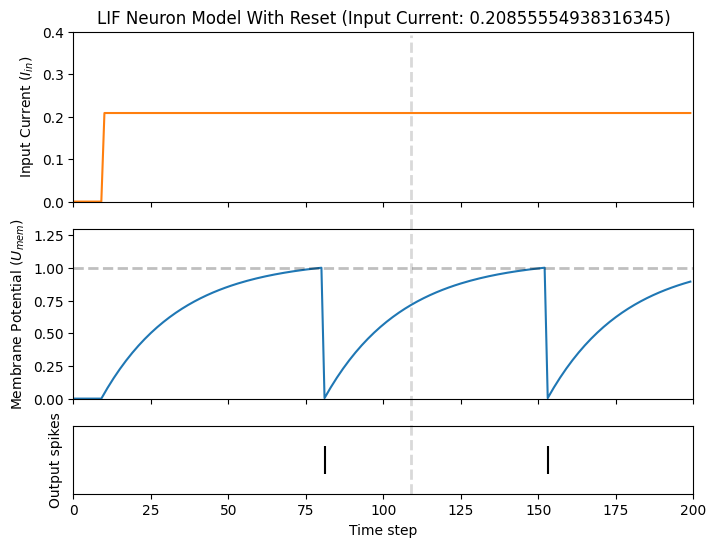

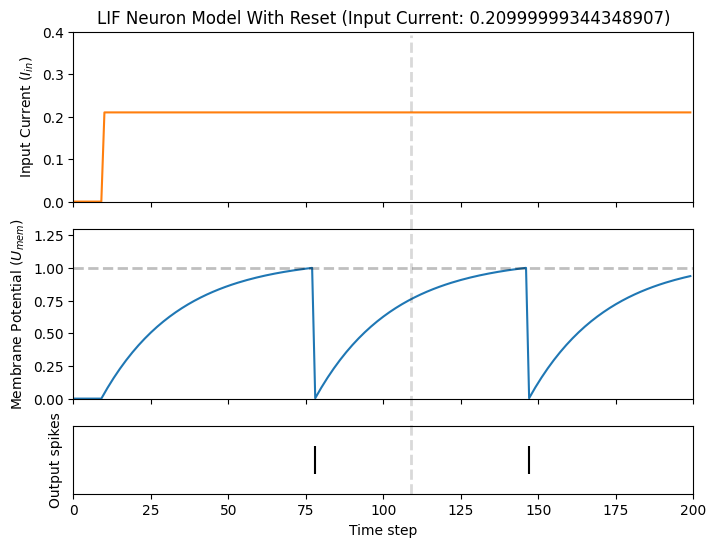

In [10]:

# Define parameters
num_steps = 200
cur_in_values = torch.linspace(0.197, 0.210, 10)  # Generate 10 values from 0.190 to 0.21

# Neuron simulation and plotting for each current value
for cur_val in cur_in_values:
    # Lists to store membrane potential and spikes
    mem_rec = []
    spk_rec = []

    # Small step current input
    cur_in = torch.cat((torch.zeros(10), torch.ones(190) * cur_val), 0)
    mem = torch.zeros(1)

    # Neuron simulation
    for step in range(num_steps):
        mem, spk = leaky_integrate_and_fire(mem, cur_in[step])  # You need to define leaky_integrate_and_fire function
        mem_rec.append(mem)
        spk_rec.append(spk)

    # Convert lists to tensors
    mem_rec = torch.stack(mem_rec)
    spk_rec = torch.stack(spk_rec)

    # Plot using your provided function
    plot_cur_mem_spk(cur_in, mem_rec, spk_rec, thr_line=1, vline=109, ylim_max2=1.3,
                     title=f"LIF Neuron Model With Reset (Input Current: {cur_val})")


Model behaviour for spike inputs

In [24]:
# Create a 1-D random spike train. Each element has a probability of 40% of firing.
num_steps=200
spk_in = spikegen.rate_conv(torch.ones((num_steps)) * 0.40)
spk_in*=0.8

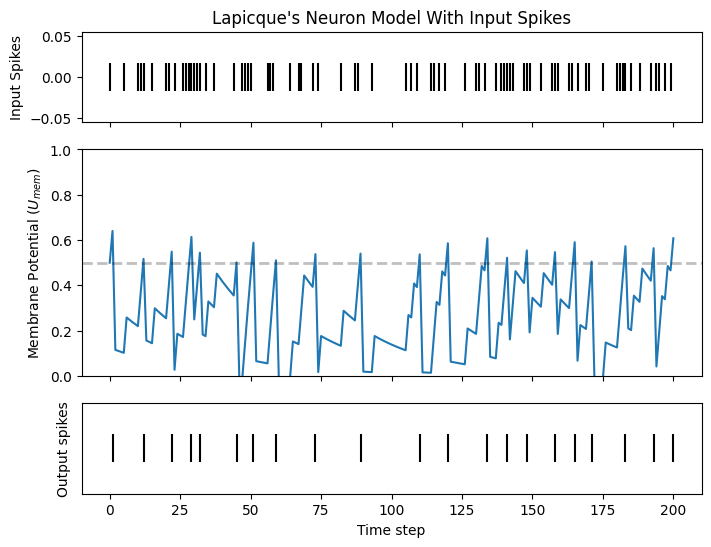

In [25]:
lif3 = snn.Lapicque(R=5.1, C=5e-3, time_step=1e-3, threshold=0.5)
mem = torch.ones(1)*0.5
spk_out = torch.zeros(1)
mem_rec = [mem]
spk_rec = [spk_out]

# Neuron simulation
for step in range(num_steps):
  spk_out, mem = lif3(spk_in[step], mem)
  spk_rec.append(spk_out)
  mem_rec.append(mem)

# convert lists to tensors
mem_rec = torch.stack(mem_rec)
spk_rec = torch.stack(spk_rec)

plot_spk_mem_spk(spk_in, mem_rec, spk_out, "Lapicque's Neuron Model With Input Spikes")
spk1=np.array(spk_rec).flatten()

In [26]:
noise = torch.randn(num_steps)
std=0.2
noise*=std
noisy=spk_in+noise



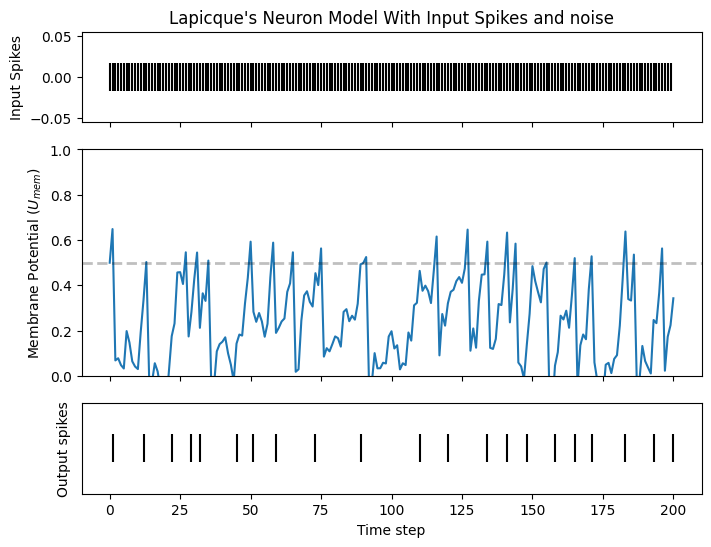

In [27]:
mem_noise = torch.ones(1) * 0.5
spk_out_noise = torch.zeros(1)
mem_rec_noise = [mem_noise]
spk_rec_noise = [spk_out_noise]

# Neuron simulation
for step in range(num_steps):
    spk_out_noise, mem_noise = lif3(noisy[step], mem_noise)
    spk_rec_noise.append(spk_out_noise)
    mem_rec_noise.append(mem_noise)

# Convert lists to tensors
mem_rec_noise = torch.stack(mem_rec_noise)
spk_rec_noise = torch.stack(spk_rec_noise)


plot_spk_mem_spk(noisy, mem_rec_noise, spk_out_noise, "Lapicque's Neuron Model With Input Spikes and noise")
spk_noise=np.array(spk_rec_noise).flatten()


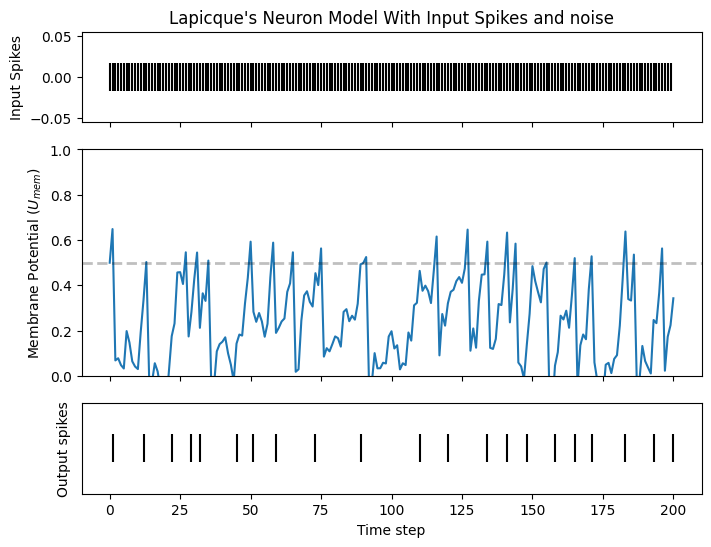

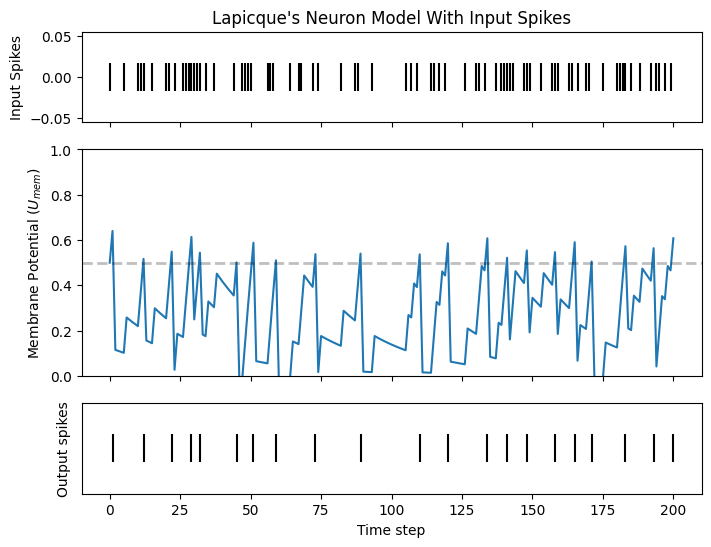

In [28]:
plot_spk_mem_spk(noisy, mem_rec_noise, spk_out_noise, "Lapicque's Neuron Model With Input Spikes and noise")

plot_spk_mem_spk(spk_in, mem_rec, spk_out, "Lapicque's Neuron Model With Input Spikes")

In [39]:
i=0
for x in range  (len(spk_noise)):
    if (spk_noise[x]!= spk1[x]):
        i+=1
i

30

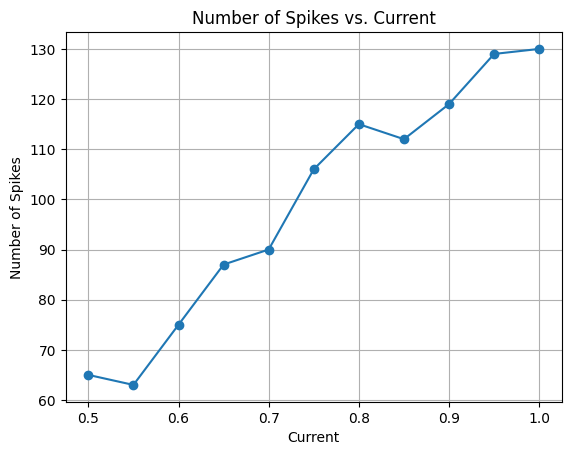

In [16]:
num_steps = 1000  
current_values = np.arange(0.5, 1.05, 0.05)  

spike_counts = []

for current_value in current_values:
    spk_in = spikegen.rate_conv(torch.ones((num_steps)) * 0.40)
    spk_in *= current_value

    # Reset neuron parameters for each iteration
    mem = torch.ones(1) * 0.5
    spk_out = torch.zeros(1)
    mem_rec = [mem]
    spk_rec = [spk_out]

    # Neuron simulation
    for step in range(num_steps):
        spk_out, mem = lif3(spk_in[step], mem)
        spk_rec.append(spk_out)
        mem_rec.append(mem)

    # Convert lists to tensors
    mem_rec = torch.stack(mem_rec)
    spk_rec = torch.stack(spk_rec)

    # Count the number of spikes
    spk1 = np.array(spk_rec).flatten()
    spike_count = np.sum(spk1)
    spike_counts.append(spike_count)

# Plotting
plt.plot(current_values, spike_counts, marker='o')
plt.title("Number of Spikes vs. Current")
plt.xlabel("Current")
plt.ylabel("Number of Spikes")
plt.grid(True)
plt.show()


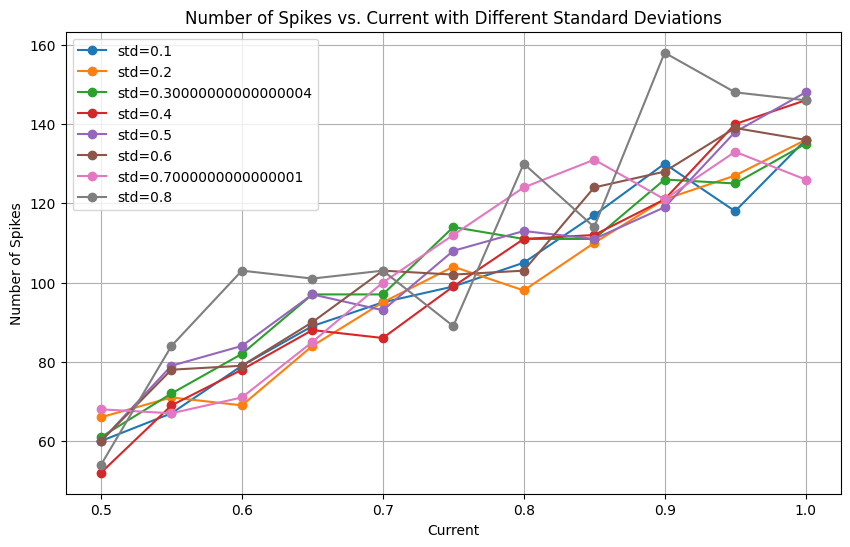

In [17]:
# Define parameters
num_steps = 1000
current_values = np.arange(0.5, 1.05, 0.05)
std_values = np.arange(0.1, 0.85, 0.1)  # Varying std from 0.1 to 0.8

# Plotting
plt.figure(figsize=(10, 6))

for std in std_values:
    spike_counts = []

    for current_value in current_values:
        spk_in = spikegen.rate_conv(torch.ones((num_steps)) * 0.40)
        spk_in *= current_value

        # Generate noise with varying standard deviation
        noise = torch.randn(num_steps) * std
        noisy = spk_in + noise

        # Reset neuron parameters for each iteration
        mem = torch.ones(1) * 0.5
        spk_out = torch.zeros(1)
        mem_rec = [mem]
        spk_rec = [spk_out]

        # Neuron simulation
        for step in range(num_steps):
            spk_out, mem = lif3(noisy[step], mem)
            spk_rec.append(spk_out)
            mem_rec.append(mem)

        # Convert lists to tensors
        mem_rec = torch.stack(mem_rec)
        spk_rec = torch.stack(spk_rec)

        # Count the number of spikes
        spk1 = np.array(spk_rec).flatten()
        spike_count = np.sum(spk1)
        spike_counts.append(spike_count)

    # Plotting for each std value
    plt.plot(current_values, spike_counts, marker='o', label=f'std={std}')

plt.title("Number of Spikes vs. Current with Different Standard Deviations")
plt.xlabel("Current")
plt.ylabel("Number of Spikes")
plt.legend()
plt.grid(True)
plt.show()


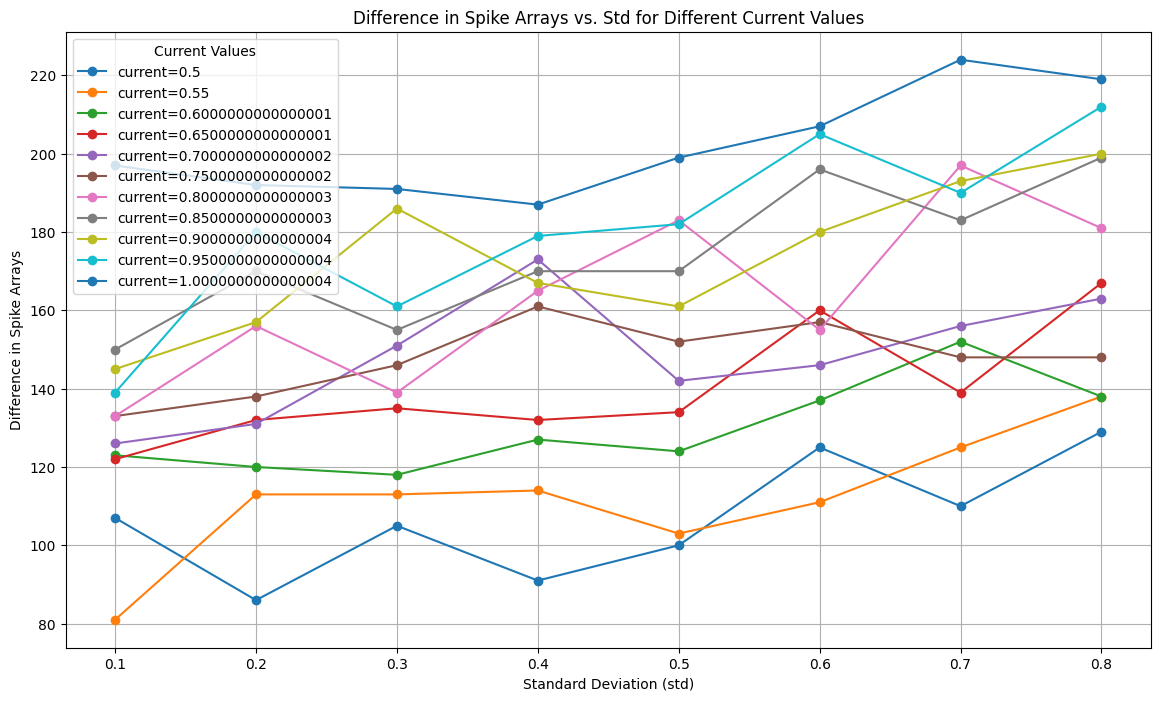

In [36]:

num_steps = 1000
current_values = np.arange(0.5, 1.05, 0.05)
std_values = np.arange(0.1, 0.85, 0.1)  # Varying std from 0.1 to 0.8

# Initialize list to store differences
differences = [[] for _ in range(len(current_values))]  # List of lists for differences, one for each current value

# Iterate over std values
for std in std_values:
    # Iterate over current values
    for j, current_value in enumerate(current_values):
        # Generate spike train for current value
        spk_in = spikegen.rate_conv(torch.ones((num_steps)) * 0.40)
        spk_in *= current_value
        
        # Reset neuron parameters for non-noisy condition
        mem = torch.ones(1) * 0.5
        spk_out = torch.zeros(1)
        mem_rec = [mem]
        spk_rec = [spk_out]
        
        # Neuron simulation for non-noisy condition
        for step in range(num_steps):
            spk_out, mem = lif3(spk_in[step], mem)
            spk_rec.append(spk_out)
            mem_rec.append(mem)
        
        # Convert lists to numpy arrays for non-noisy condition
        spk_rec = np.array(spk_rec).flatten()
        
        # Generate noisy spike train
        noise = torch.randn(num_steps) * std
        noisy = spk_in + noise
        
        # Reset neuron parameters for noisy condition
        mem_noise = torch.ones(1) * 0.5
        spk_out_noise = torch.zeros(1)
        mem_rec_noise = [mem_noise]
        spk_rec_noise = [spk_out_noise]
        
        # Neuron simulation for noisy condition
        for step in range(num_steps):
            spk_out_noise, mem_noise = lif3(noisy[step], mem_noise)
            spk_rec_noise.append(spk_out_noise)
            mem_rec_noise.append(mem_noise)
        
        # Convert lists to numpy arrays for noisy condition
        spk_rec_noise = np.array(spk_rec_noise).flatten()
        
        # Calculate difference between noisy and non-noisy spike arrays
        spike_diff = np.sum(spk_rec_noise != spk_rec)
        
        # Append difference to corresponding current value list
        differences[j].append(spike_diff)

# Plotting differences for each current value
plt.figure(figsize=(14, 8))
for i, current_value in enumerate(current_values):
    plt.plot(std_values, differences[i], marker='o', label=f'current={current_value}')

plt.title("Difference in Spike Arrays vs. Std for Different Current Values")
plt.xlabel("Standard Deviation (std)")
plt.ylabel("Difference in Spike Arrays")
plt.legend(title='Current Values')
plt.grid(True)
plt.show()


In [ ]:
# Define parameters
num_steps = 1000
current_values = np.linspace(0.5, 1.0, 10)
std_values = np.linspace(0.1, 0.8, 10)

# Initialize list to store differences
differences = [[] for _ in range(len(std_values))]

# Iterate over current values
for current_value in current_values:
    # Iterate over std values
    for j, std in enumerate(std_values):
        # Generate spike train for current value
        spk_in = torch.ones((num_steps)) * 0.40
        spk_in *= current_value
        
        # Reset neuron parameters for non-noisy condition
        mem = torch.ones(1) * 0.5
        spk_out = torch.zeros(1)
        mem_rec = [mem]
        spk_rec = [spk_out]
        
        # Neuron simulation for non-noisy condition
        for step in range(num_steps):
            spk_out, mem = lif3(spk_in[step], mem)
            spk_rec.append(spk_out)
            mem_rec.append(mem)
        
        # Convert lists to numpy arrays for non-noisy condition
        spk_rec = np.array(spk_rec).flatten()
        
        # Generate noisy spike train
        noise = torch.randn(num_steps) * std
        noisy = spk_in + noise
        
        # Reset neuron parameters for noisy condition
        mem_noise = torch.ones(1) * 0.5
        spk_out_noise = torch.zeros(1)
        mem_rec_noise = [mem_noise]
        spk_rec_noise = [spk_out_noise]
        
        # Neuron simulation for noisy condition
        for step in range(num_steps):
            spk_out_noise, mem_noise = lif3(noisy[step], mem_noise)
            spk_rec_noise.append(spk_out_noise)
            mem_rec_noise.append(mem_noise)
        
        # Convert lists to numpy arrays for noisy condition
        spk_rec_noise = np.array(spk_rec_noise).flatten()
        
        # Calculate difference between noisy and non-noisy spike arrays
        spike_diff = np.sum(spk_rec_noise != spk_rec)
        
        # Append difference to corresponding std value list
        differences[j].append(spike_diff)

# Plotting differences for each std value
        plt.figure(figsize=(14, 8))
for i, current_value in enumerate(current_values):
    plt.plot(std_values, differences[i], marker='o', label=f'current={current_value:.2f}')

plt.title("Difference in Spike Arrays vs. Std for Different current Values")
plt.xlabel("Std")
plt.ylabel("Difference in Spike Arrays")
plt.grid(True)
plt.legend(title='Current Values')
plt.show()